# **BÙI KHÁNH VĨNH - 2010091 - Transformations**

## **DATA AND LIBRARIES PREPARATION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

In [ ]:
%cd /content/drive/MyDrive/CV-assignment/Project5

In [ ]:
import cv2
import copy
import numpy as np
from matplotlib import pyplot as plt

## **Panoramic photos (Stich Images) WITH LIBRARY**

(3024, 4032, 3)
(3024, 4032, 3)
(3024, 4032, 3)


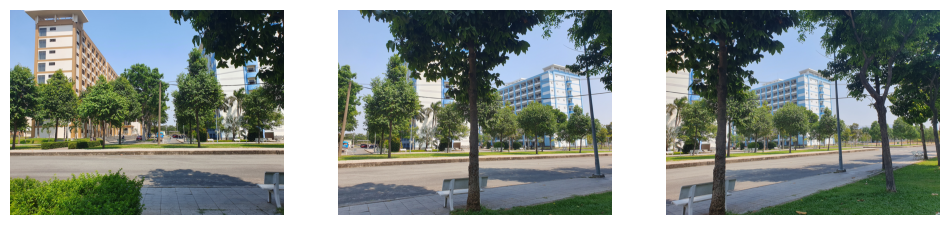

In [5]:
import cv2
image_paths=['left.png','mid.png','right.png']
# initialized a list of images
imgs = []
plt.figure(figsize=(12, 6))
for i in range(len(image_paths)):
    imgs.append(cv2.imread(image_paths[i]))
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    print(imgs[i].shape)
plt.show()

In [6]:
stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(imgs)
if dummy != cv2.STITCHER_OK:
    print("stitching ain't successful")
else:
    print('Your Panorama is ready!!!')

Your Panorama is ready!!!


(3082, 7050, 3)


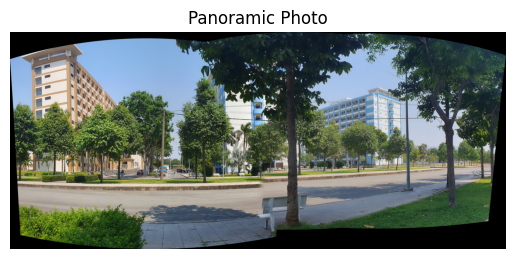

In [7]:
print(output.shape)
plt.imshow(output)
plt.title("Panoramic Photo")
plt.axis('off')
plt.show()

In [8]:
source_points = np.float32([
    [40,400],  # Top left
    [200,output.shape[0]-210],  # Bottom left
    [output.shape[1]-275,output.shape[0]-375], # Bottom Right
    [output.shape[1]-40,360],  # Top Right
])
destination_points = np.float32([
    [0,0],  # Top left
    [0,output.shape[0]],  # Bottom left
    [output.shape[1],output.shape[0]], # Bottom Right
    [output.shape[1],0],  # Top Right
])
temp = copy.deepcopy(output)

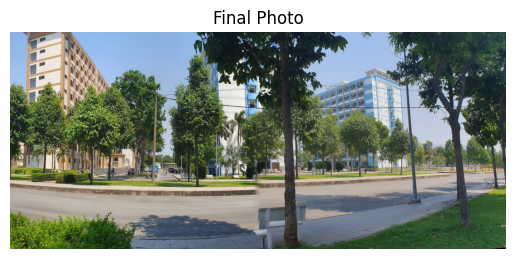

In [9]:
M = cv2.getPerspectiveTransform(source_points,destination_points)
out = cv2.warpPerspective(temp ,M,(temp.shape[1],temp.shape[0]),flags=cv2.INTER_LINEAR)
plt.imshow(out)
plt.title("Final Photo")
plt.axis('off')
plt.show()

(431, 577, 3)
(432, 573, 3)
(432, 574, 3)


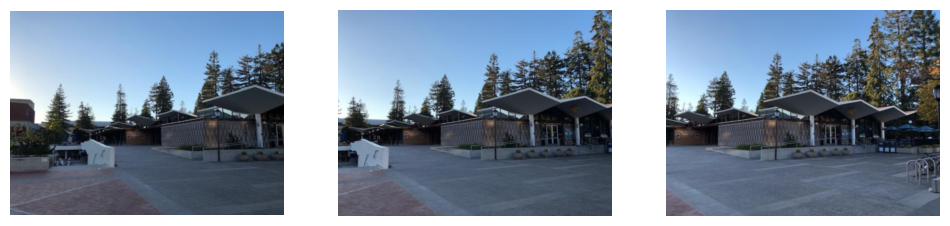

In [10]:
import cv2
image_paths=['left_1.png','mid_1.png','right_1.png']
# initialized a list of images
imgs = []
plt.figure(figsize=(12, 6))
for i in range(len(image_paths)):
    imgs.append(cv2.imread(image_paths[i]))
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(imgs[i])
    plt.axis('off')
    print(imgs[i].shape)
plt.show()

In [11]:
stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(imgs)
if dummy != cv2.STITCHER_OK:
    print("stitching ain't successful")
else:
    print('Your Panorama is ready!!!')

Your Panorama is ready!!!


(406, 736, 3)


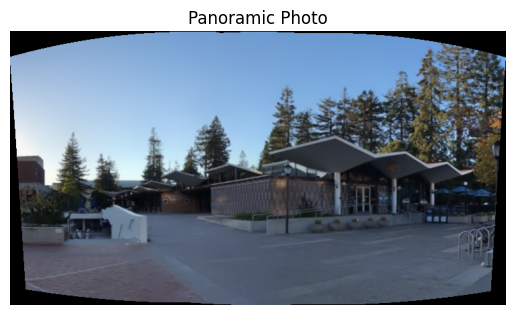

In [12]:
print(output.shape)
plt.imshow(output)
plt.title("Panoramic Photo")
plt.axis('off')
plt.show()

In [13]:
source_points = np.float32([
    [5,40],  # Top left
    [25,output.shape[0]-25],  # Bottom left
    [output.shape[1]-25,output.shape[0]-25], # Bottom Right
    [output.shape[1]-5,40],  # Top Right
])
destination_points = np.float32([
    [0,0],  # Top left
    [0,output.shape[0]],  # Bottom left
    [output.shape[1],output.shape[0]], # Bottom Right
    [output.shape[1],0],  # Top Right
])

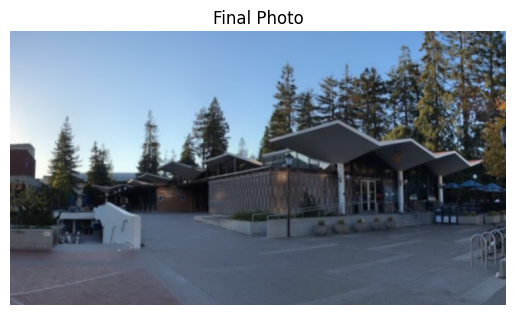

In [14]:
temp = copy.deepcopy(output)
M = cv2.getPerspectiveTransform(source_points,destination_points)
out = cv2.warpPerspective(temp ,M,(temp.shape[1],temp.shape[0]),flags=cv2.INTER_LINEAR)
plt.imshow(out)
plt.title("Final Photo")
plt.axis('off')
plt.show()

## **Panoramic photos (Stich Images) WITHOUT LIBRARY**

In [15]:
class Panaroma:
    def image_stitch(self, images, lowe_ratio=0.75, max_Threshold=4.0, match_status=False,method='SIFT'):
        # detect the features and keypoints from SIFT
        (imageB, imageA) = images
        (key_points_A, features_of_A) = self.detect_feature_and_keypoints(imageA,method)
        (key_points_B, features_of_B) = self.detect_feature_and_keypoints(imageB,method)

        # get the valid matched points
        Values = self.match_keypoints(key_points_A, key_points_B, features_of_A, features_of_B, lowe_ratio, max_Threshold)
        if Values is None:
            return None

        # get wrap perspective of image using computed homography
        (matches, Homography, status) = Values
        result_image = self.get_warp_perspective(imageA, imageB, Homography)
        result_image[0:imageB.shape[0], 0:imageB.shape[1]] = imageB

        # check to see if the keypoint matches should be visualized
        if match_status:
            vis = self.draw_matches(imageA, imageB, key_points_A, key_points_B, matches, status)
            return result_image, vis

        return result_image
    def get_warp_perspective(self, imageA, imageB, Homography):
        val = imageA.shape[1] + imageB.shape[1]
        result_image = cv2.warpPerspective(imageA, Homography, (val, imageA.shape[0]))
        return result_image
    def detect_feature_and_keypoints(self, image,method):
        # detect and extract features from the image
        if(method == 'SIFT'):
            descriptors = cv2.SIFT_create()
        elif(method == "ORB"):
            descriptors = cv2.ORB_create()
        keypoints, features = descriptors.detectAndCompute(image, None)
        keypoints = np.float32([i.pt for i in keypoints])
        return keypoints, features

    def get_all_possible_matches(self, featuresA, featuresB):
        # compute the all matches using Euclidean distance. Opencv provide DescriptorMatcher_create() function for that
        match_instance = cv2.DescriptorMatcher_create("BruteForce")
        All_Matches = match_instance.knnMatch(featuresA, featuresB, 2)
        return All_Matches


    def get_all_valid_matches(self, AllMatches, lowe_ratio):
        # to get all valid matches according to lowe concept..
        valid_matches = []
        for val in AllMatches:
            if len(val) == 2 and val[0].distance < val[1].distance * lowe_ratio:
                valid_matches.append((val[0].trainIdx, val[0].queryIdx))
        return valid_matches

    def compute_homography(self, pointsA, pointsB, max_Threshold):
        return cv2.findHomography(pointsA, pointsB, cv2.RANSAC, max_Threshold)

    def match_keypoints(self, KeypointsA, KeypointsB, featuresA, featuresB, lowe_ratio, max_Threshold):
        all_matches = self.get_all_possible_matches(featuresA, featuresB)
        valid_matches = self.get_all_valid_matches(all_matches, lowe_ratio)

        if len(valid_matches) <= 4:
            return None

        # construct the two sets of points
        points_A = np.float32([KeypointsA[i] for (_, i) in valid_matches])
        points_B = np.float32([KeypointsB[i] for (i, _) in valid_matches])
        (homograpgy, status) = self.compute_homography(points_A, points_B, max_Threshold)
        return valid_matches, homograpgy, status


    def get_image_dimension(self, image):
        return image.shape[:2]


    def get_points(self, imageA, imageB):
        (hA, wA) = self.get_image_dimension(imageA)
        (hB, wB) = self.get_image_dimension(imageB)
        vis = np.zeros((max(hA, hB), wA + wB, 3), dtype="uint8")
        vis[0:hA, 0:wA] = imageA
        vis[0:hB, wA:] = imageB
        return vis


    def draw_matches(self, imageA, imageB, KeypointsA, KeypointsB, matches, status):
        (hA, wA) = self.get_image_dimension(imageA)
        vis = self.get_points(imageA, imageB)

        # loop over the matches
        for ((trainIdx, queryIdx), s) in zip(matches, status):
            if s == 1:
                ptA = (int(KeypointsA[queryIdx][0]), int(KeypointsA[queryIdx][1]))
                ptB = (int(KeypointsB[trainIdx][0]) + wA, int(KeypointsB[trainIdx][1]))
                cv2.line(vis, ptA, ptB, (0, 255, 0), 1)
        return vis

In [29]:
import imutils

filename=['left_1.png','mid_1.png','right_1.png']
no_of_images = len(filename)
images = []
for i in range(no_of_images):
    temp = cv2.imread(filename[i])
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    images.append(temp)

# We need to modify the images width and height to keep our aspect ratio same across images
for i in range(no_of_images):
    images[i] = imutils.resize(images[i])

for i in range(no_of_images):
    images[i] = imutils.resize(images[i])

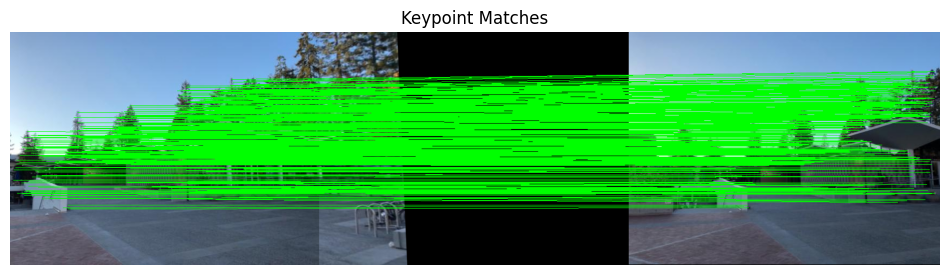

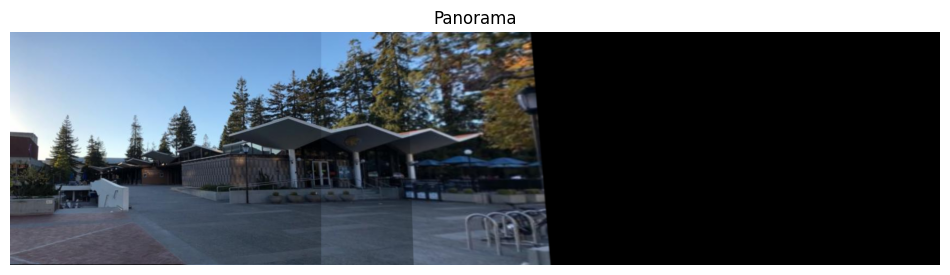

In [30]:
panorama = Panaroma()
(result, matched_points) = panorama.image_stitch([images[no_of_images - 2], images[no_of_images - 1]], match_status=True,method='SIFT')
for i in range(no_of_images - 2):
    (result, matched_points) = panorama.image_stitch([images[no_of_images - i - 3], result], match_status=True,method='SIFT')
plt.figure(figsize=(12, 9))
plt.imshow( matched_points)
plt.title("Keypoint Matches")
plt.axis('off')
plt.show()
plt.figure(figsize=(12, 9))
plt.imshow(result)
plt.title("Panorama")
plt.axis('off')
plt.show()

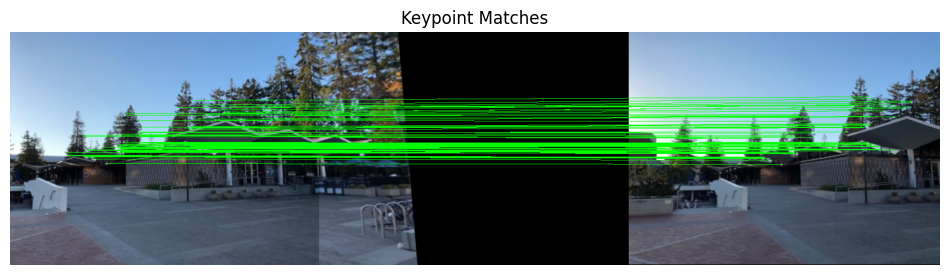

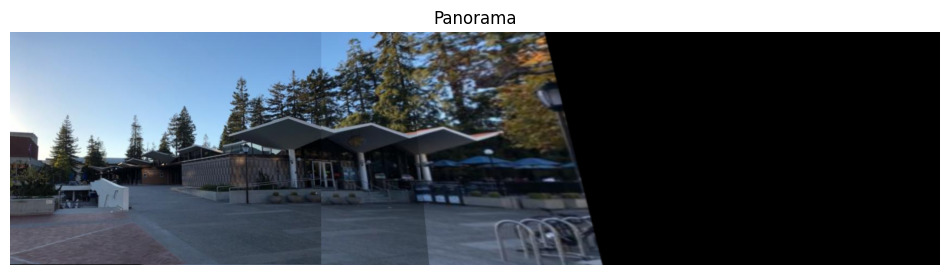

In [31]:
panorama = Panaroma()
(result, matched_points) = panorama.image_stitch([images[no_of_images - 2], images[no_of_images - 1]], match_status=True,method='ORB')
for i in range(no_of_images - 2):
    (result, matched_points) = panorama.image_stitch([images[no_of_images - i - 3], result], match_status=True,method='ORB')
plt.figure(figsize=(12, 9))
plt.imshow( matched_points)
plt.title("Keypoint Matches")
plt.axis('off')
plt.show()
plt.figure(figsize=(12, 9))
plt.imshow(result)
plt.title("Panorama")
plt.axis('off')
plt.show()